In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')
current_time = datetime.now()
print(current_time.strftime("%Y-%m-%d %H:%M:%S"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2025-07-06 21:44:53


In [2]:
kmeans_ws_path = '/content/drive/MyDrive/kmeans_ws.csv'
#ws_char_path  = '/content/drive/MyDrive/ws_charateristics_202506191550.csv'
site_amp3_path  = '/content/drive/MyDrive/site_amp3_202506191536.csv'

kmeans_ws_df  = pd.read_csv(kmeans_ws_path)
#ws_char_df    = pd.read_csv(ws_char_path)
site_amp3_df  = pd.read_csv(site_amp3_path)

# 3️⃣ (Optional) sanity‑check
print(kmeans_ws_df.head())
#print(ws_char_df.head())
print(site_amp3_df.head())

    site_no  drain_area_va   alt_va                        labels  \
0  12305000        11740.0  1794.75   Low-Elevation Large Streams   
1  12322000        13700.0  1700.00   Low-Elevation Large Streams   
2  13092747          259.0  3630.00  Mid-Elevation Medium Streams   
3  13150430           70.0  4834.45  Mid-Elevation Medium Streams   
4  13154500        35800.0  2495.13   Low-Elevation Large Streams   

   drain_area_km2        alt_m  
0    30406.309266   547.039800  
1    35482.660728   518.160000  
2      670.803586  1106.424000  
3      181.298266  1473.540360  
4    92721.113434   760.515624  
   Unnamed: 0      site       amp       ph_l   site_no  dec_lat_va  \
0           0  12305000  0.501713  28.067854  12305000   48.616883   
1           1  12322000  0.595400  22.359741  12322000   48.996389   
2           2  13092747  0.471255   6.327435  13092747   42.562500   
3           3  13150430  0.632628  -7.784095  13150430   43.323361   
4           4  13154500  0.439203   2

In [3]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'

In [4]:
merged_df = pd.merge(
    kmeans_ws_df[['site_no', 'labels']],
#    ws_char_df[['site_no', 'dam_and_diversion']],
    site_amp3_df[['site_no','dam_and_diversion','amp'  ,'ph_l' ]],
    on='site_no',
    how='inner'  # or 'left', 'right', 'outer' depending on your needs
)

print(merged_df)

merged_df.to_csv(reg_kmean_pasta_path, index=False)


     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

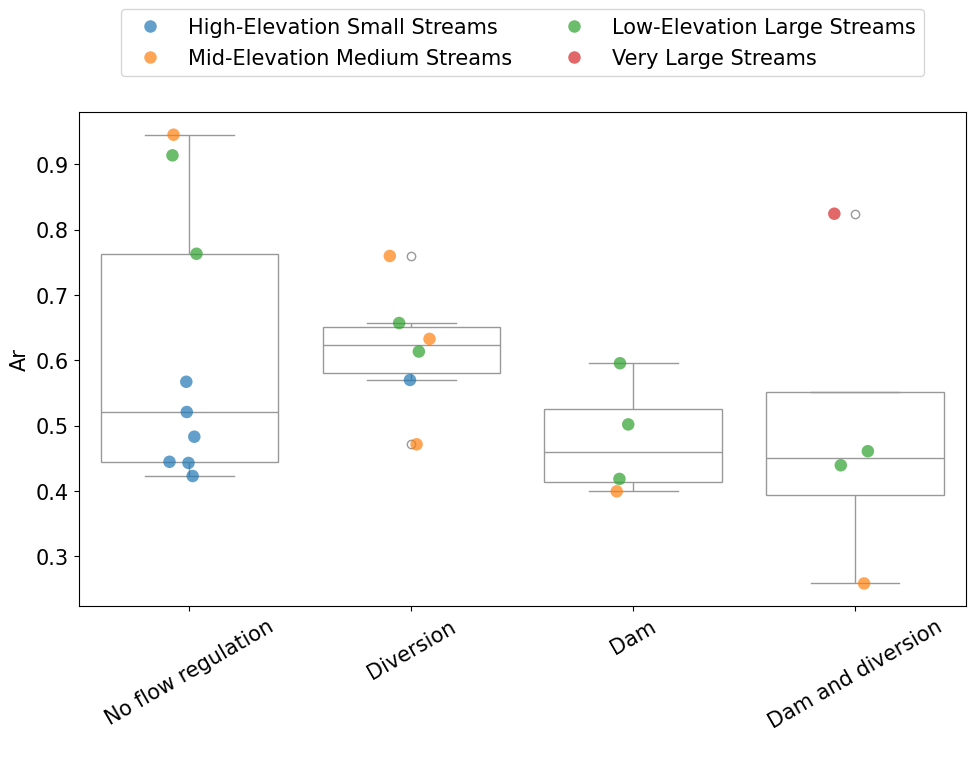

In [5]:
df = merged_df
x = "dam_and_diversion"
y = "amp"
ylabel = "Ar"
fontsize = 15
png = 'dam_and_diversion_Ar_labels.png'
figsize=(10, 8)
size= 9
fig, ax = plt.subplots(figsize= figsize )

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
           )

label_order = ["High-Elevation Small Streams", "Mid-Elevation Medium Streams", "Low-Elevation Large Streams", "Very Large Streams"]

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
              hue_order=label_order,
#              color='black',
              alpha=0.7, jitter=True, size= size
             # , dodge=True
             )

# Remove the legend title
ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2 , fontsize= fontsize
         )

plt.xticks(rotation= 30 , fontsize= fontsize )
plt.yticks(  fontsize= fontsize )
plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()

plt.savefig( png
           # , dpi=300, bbox_inches='tight'
           )

# Save as EPS
plt.savefig('FIG_Ar.eps', format='eps', dpi=500)

# Save with higher DPI, specific quality, and tight bounding box
plt.savefig('FIG_Ar.jpg', dpi=400
             #, bbox_inches='tight'
             )

plt.show()

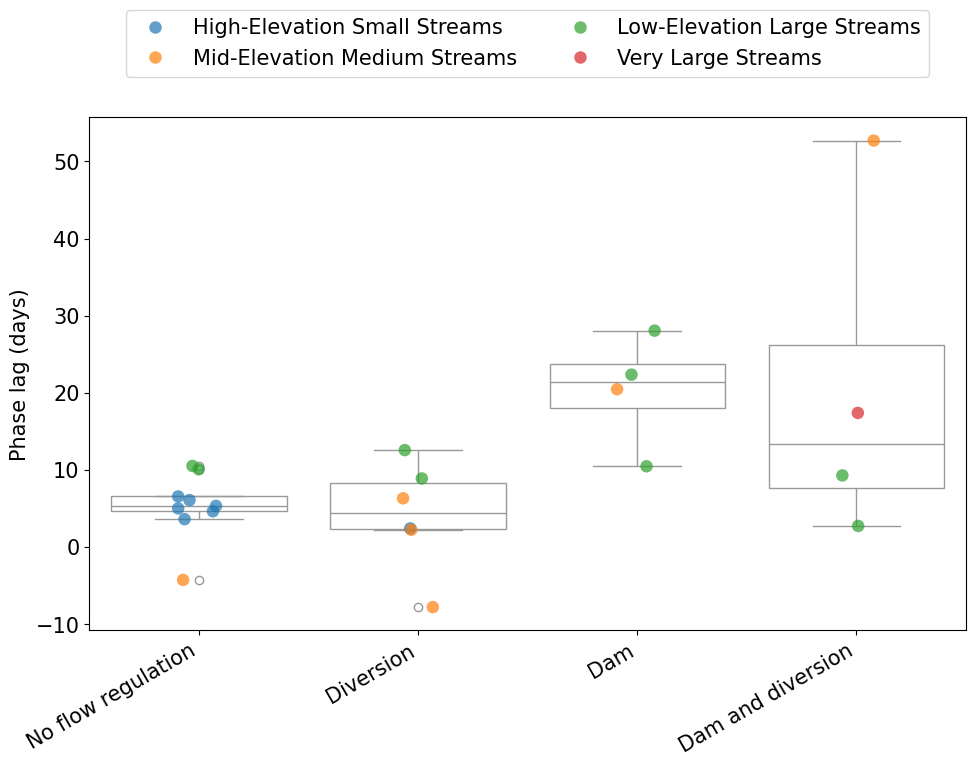

In [6]:
# generates a box plot with a stripplot overlay using the seaborn and matplotlib libraries.

# --- Configuration Parameters ---
df = merged_df
x_col = "dam_and_diversion"
y_col = "ph_l"
y_label_text = "Phase lag (days)" # More descriptive variable name
#plot_font_size = 12
png_filename = 'dam_and_diversion_ph_l_labels.png'
eps_filename = 'FIG_ph_l.eps'
jpg_filename = 'FIG_ph_l.jpg'

# Define the explicit order for x-axis categories
x_order = [
    "No flow regulation",
    "Diversion",
    "Dam",
    "Dam and diversion"
]

# --- Create the plot ---
fig, ax = plt.subplots(figsize= figsize ) # Explicitly create figure and axes for better control

# Create the box plot
sns.boxplot(x=x_col, y=y_col, data=df, color="white", order=x_order, ax=ax)
# color="white" makes the stripplot points more visible

# Overlay the stripplot
sns.stripplot(x=x_col, y=y_col, data=df,
              hue="labels",
              hue_order=label_order, # Color points by the 'labels' column
              alpha=0.7,    # Set transparency for individual points
              jitter=True,  # Add jitter to prevent overplotting of points
              ax=ax   , size= size      # Ensure stripplot uses the same axes
             )

# --- Customize Plot Elements ---

# Legend customization
ax.legend(title=None,             # Remove the default legend title
          loc='upper center',     # Position legend
          bbox_to_anchor=(0.5, 1.23), # Coordinates relative to axes for external positioning
          ncol=2 , fontsize= fontsize                 # Arrange legend items in 2 columns
         )


# X-axis tick labels
ax.set_xticks(range(len(x_order))) # Ensure ticks are aligned with the ordered categories
ax.set_xticklabels(x_order, rotation=30, ha='right', fontsize= fontsize) # Rotate and set font, 'ha' for alignment
ax.set_xlabel("") # Remove x-axis label as categories are self-explanatory or covered by title

# Y-axis label and ticks
ax.set_ylabel(y_label_text, fontsize= fontsize)
ax.tick_params(axis='y', labelsize= fontsize) # Set font size for y-axis ticks

# Remove plot title (if desired, or add a meaningful one here)
ax.set_title("") # Or ax.set_title("Relationship between Flow Regulation and Ar")

# Adjust layout to prevent labels/elements from overlapping
plt.tight_layout()

# --- Save the plot in multiple formats ---

# Save as PNG with higher DPI and tight bounding box
plt.savefig(png_filename, dpi=300, bbox_inches='tight')

# Save as EPS (vector format, ideal for publications)
plt.savefig(eps_filename, format='eps', dpi=500, bbox_inches='tight')

# Save as JPG with specified DPI and tight bounding box
plt.savefig(jpg_filename, dpi=400
            #, quality=90
            , bbox_inches='tight') # quality for JPG compression

# --- Display the plot ---
plt.show()

In [7]:
df_summer = pd.read_csv("/content/drive/MyDrive/df_cleaned_summer.csv")

# Merge with the existing dataframe
reg_df = pd.merge(merged_df, df_summer, on='site_no')

reg_df

,site_no,labels,dam_and_diversion,amp,ph_l,tmean,Date,rad_d,Days_Since_October_1st,00010_Mean,00060_Mean,Month,Year
0,12305000,Low-Elevation Large Streams,Dam,0.501713,28.067854,15.100000,2012-06-01,4.183052,243,8.5,31500.0,6,2012
1,12305000,Low-Elevation Large Streams,Dam,0.501713,28.067854,13.240001,2012-06-02,4.200266,244,8.5,37500.0,6,2012
2,12305000,Low-Elevation Large Streams,Dam,0.501713,28.067854,14.009001,2012-06-03,4.217481,245,8.5,40100.0,6,2012
3,12305000,Low-Elevation Large Streams,Dam,0.501713,28.067854,16.588001,2012-06-04,4.234695,246,9.5,39900.0,6,2012
4,12305000,Low-Elevation Large Streams,Dam,0.501713,28.067854,10.858001,2012-06-05,4.251909,247,10.0,42200.0,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28524,13342500,Low-Elevation Large Streams,Dam and diversion,0.460745,9.294641,17.330099,2024-08-27,5.680688,330,11.4,10500.0,8,2024
28525,13342500,Low-Elevation Large Streams,Dam and diversion,0.460745,9.294641,15.716600,2024-08-28,5.697902,331,10.9,10600.0,8,2024
28526,13342500,Low-Elevation Large Streams,Dam and diversion,0.460745,9.294641,18.979599,2024-08-29,5.715116,332,11.1,10600.0,8,2024
28527,13342500,Low-Elevation Large Streams,Dam and diversion,0.460745,9.294641,22.762400,2024-08-30,5.732331,333,11.3,10500.0,8,2024


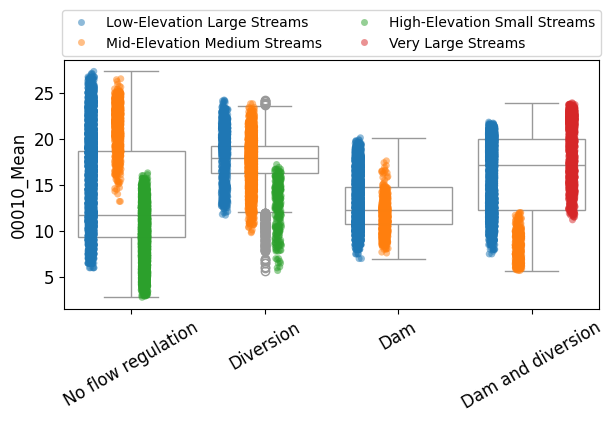

In [8]:
df =  reg_df
x = "dam_and_diversion"
y = "00010_Mean"
ylabel = "00010_Mean"
fontsize = 12
png = 'dam_and_diversion_00010_Mean_labels.png'

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
           )

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",


              alpha=0.5, jitter=True
              , dodge=True
             )



ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2
         )

plt.xticks(rotation= 30 , fontsize= fontsize )

plt.yticks(  fontsize= fontsize )

plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()

plt.savefig( png


           )

# Save as EPS
plt.savefig('FIG_ST.eps', format='eps', dpi=500)

# Save with higher DPI, specific quality, and tight bounding box
plt.savefig('FIG_ST.jpg', dpi=400
             #, bbox_inches='tight'
             )


plt.show()

ordered_sites [12305000 13341050 13192200 12322000 13317660 13342500 13190500 13154500
 13092747 13213000 13150430 13211205 13307000 13304050 13340000 13340600
 13176400 13310850 13310800 13311000 13296000 13311450 13311250]


/tmp/ipython-input-9-432767589.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


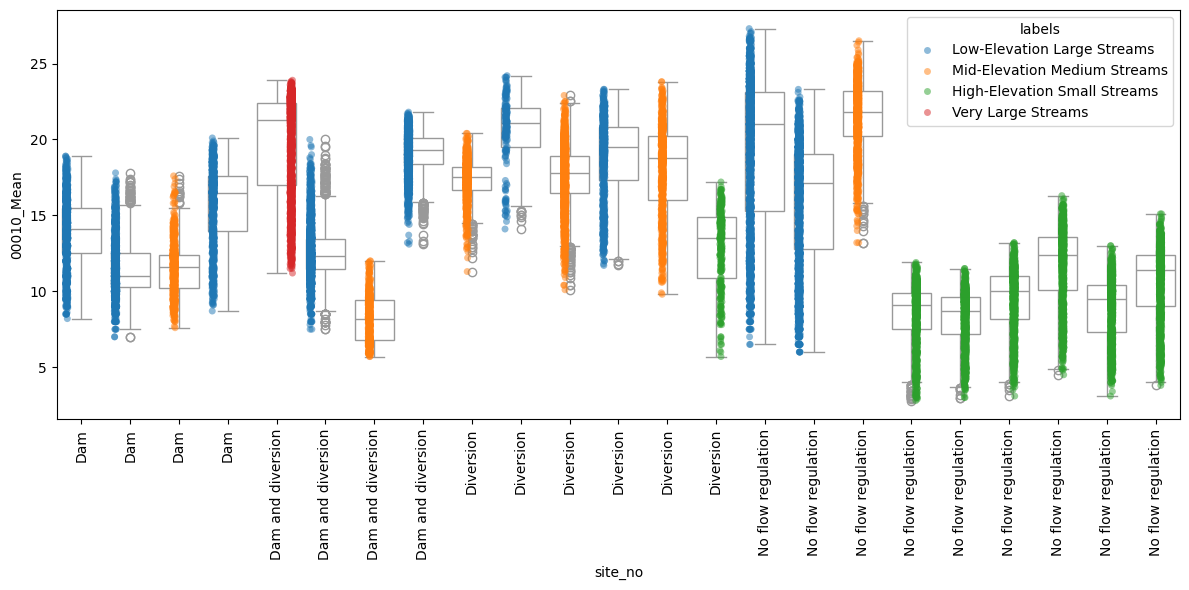

In [9]:
df =  reg_df
x = "site_no" # dam_and_diversion
y = "00010_Mean"
ylabel = "00010_Mean"
fontsize = 12
png = 'site_no_00010_Mean_labels.png'

ordered_sites = reg_df.sort_values('dam_and_diversion')['site_no'].unique()

print("ordered_sites",ordered_sites)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

sns.boxplot(x= x, y= y , data= df, color = "white", order=ordered_sites
           )

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",


              alpha=0.5, jitter=True
              , dodge=True
             )

# Replace x-tick labels with corresponding dam_and_diversion values
labels = [reg_df[reg_df['site_no'] == site]['dam_and_diversion'].iloc[0] for site in ordered_sites]
ax.set_xticklabels(labels)

plt.xticks(rotation= 90)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

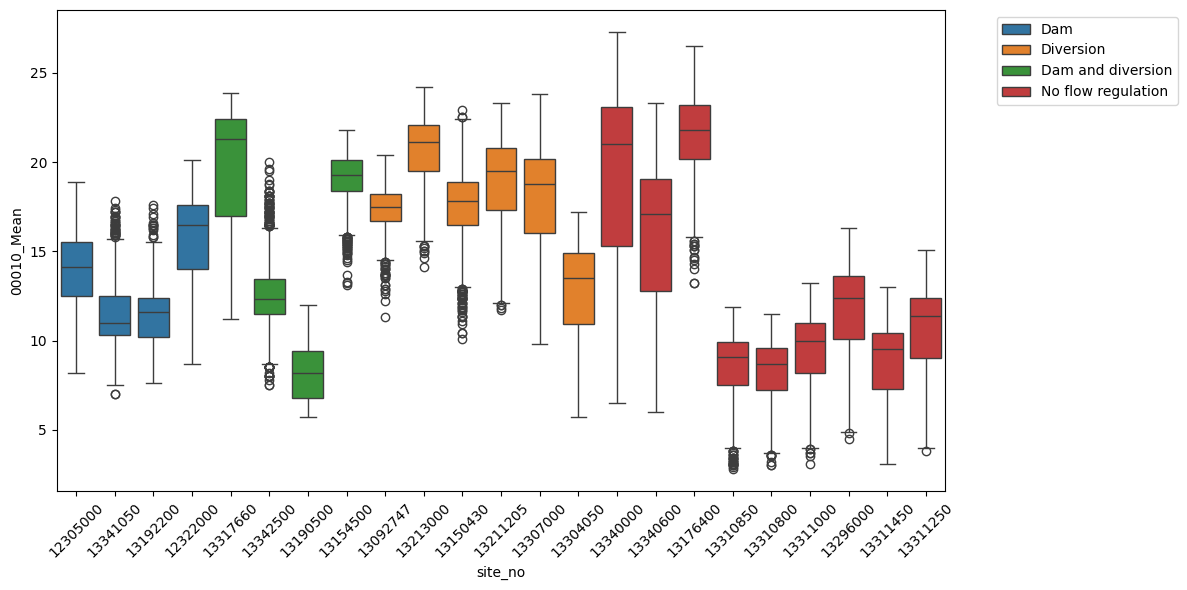

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='site_no',
    y='00010_Mean',
    hue='dam_and_diversion',  # Adds color-coding
    data=reg_df,
    order=ordered_sites
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ordered_sites [12305000 13341050 13192200 12322000 13317660 13342500 13190500 13154500
 13092747 13213000 13150430 13211205 13307000 13304050 13340000 13340600
 13176400 13310850 13310800 13311000 13296000 13311450 13311250]


/tmp/ipython-input-11-1513110947.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


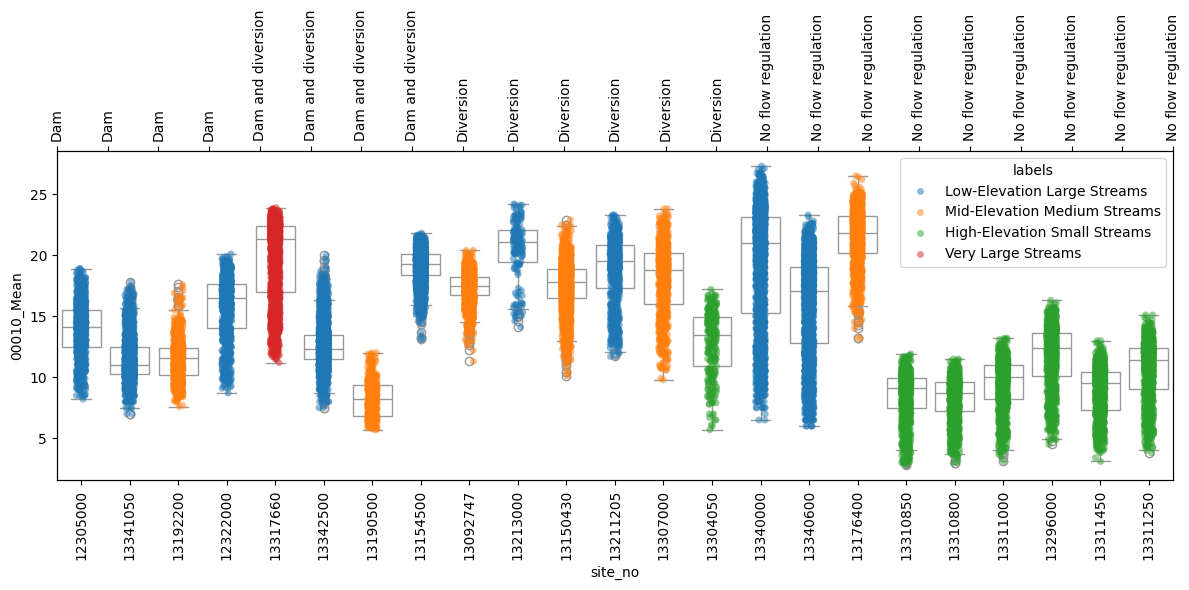

In [11]:

df =  reg_df
x = "site_no" # dam_and_diversion
y = "00010_Mean"
ylabel = "00010_Mean"
fontsize = 12
png = 'site_no_00010_Mean_labels.png'

ordered_sites = reg_df.sort_values('dam_and_diversion')['site_no'].unique()

print("ordered_sites",ordered_sites)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

ax1 = sns.boxplot(x= x, y= y , data= df, color = "white", order=ordered_sites
           )

sns.stripplot(x= x, y= y, data= df,
              hue="labels",


              alpha=0.5, jitter=True
              #, dodge=True
             )

# Rotate x-ticks for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)

# Create a second x-axis at the top for 'dam_and_diversion'
ax2 = ax1.twiny()  # Share the same y-axis

# Set positions of the new x-ticks (same as original)
ax2.set_xticks(ax1.get_xticks())

print(ax1.get_xticks())
print(ax2.get_xticks())

# Get corresponding 'dam_and_diversion' labels for each site
dam_labels = [
    reg_df[reg_df['site_no'] == site]['dam_and_diversion'].iloc[0]
    for site in ordered_sites
]

# Apply labels to the top axis
ax2.set_xticklabels(dam_labels, rotation= 90 )




# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-979550788.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=45)


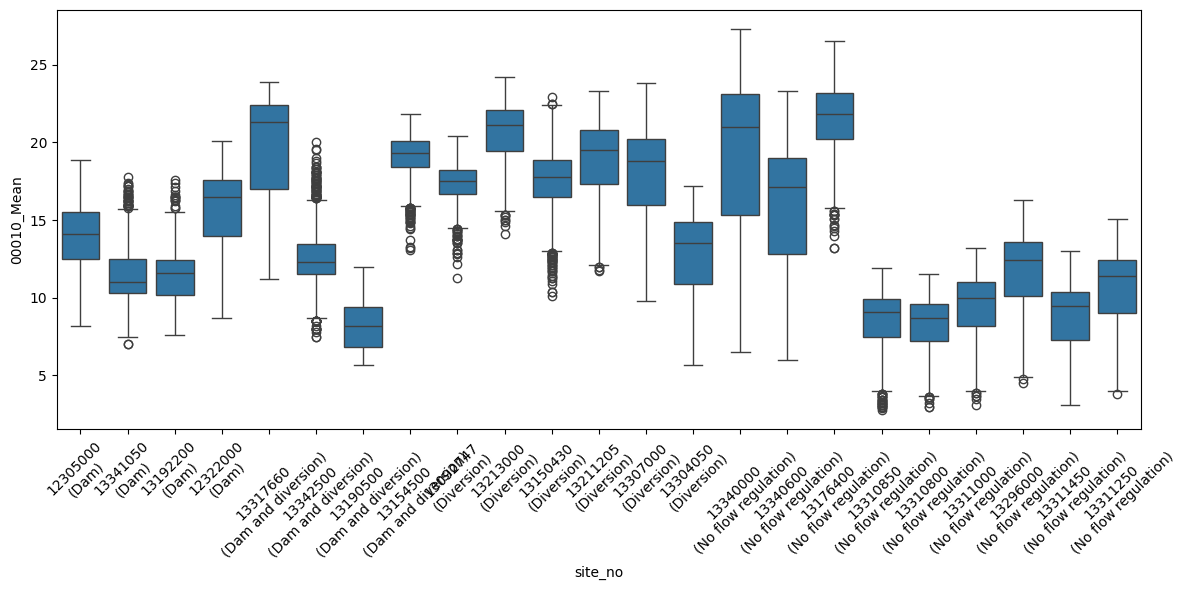

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='site_no', y='00010_Mean', data=reg_df, order=ordered_sites)

# Combine site_no and dam_and_diversion in labels
new_labels = [
    f"{site}\n({reg_df[reg_df['site_no'] == site]['dam_and_diversion'].iloc[0]})"
    for site in ordered_sites
]
ax.set_xticklabels(new_labels, rotation=45)

plt.tight_layout()
plt.show()

ordered_sites [12305000 13341050 13192200 12322000 13317660 13342500 13190500 13154500
 13092747 13213000 13150430 13211205 13307000 13304050 13340000 13340600
 13176400 13310850 13310800 13311000 13296000 13311450 13311250]
unique_dams ['Dam' 'Diversion' 'Dam and diversion' 'No flow regulation']


/tmp/ipython-input-13-2709566910.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


dam Dam
dam Dam
dam Dam
dam Dam
dam Dam and diversion
mid_pos 1.5
dam Dam and diversion
dam Dam and diversion
dam Dam and diversion
dam Diversion
mid_pos 5.5
dam Diversion
dam Diversion
dam Diversion
dam Diversion
dam Diversion
dam No flow regulation
mid_pos 10.5
dam No flow regulation
dam No flow regulation
dam No flow regulation
dam No flow regulation
dam No flow regulation
dam No flow regulation
dam No flow regulation
dam No flow regulation
mid_pos 18.0
dam_positions [1.5, 5.5, 10.5, 18.0]


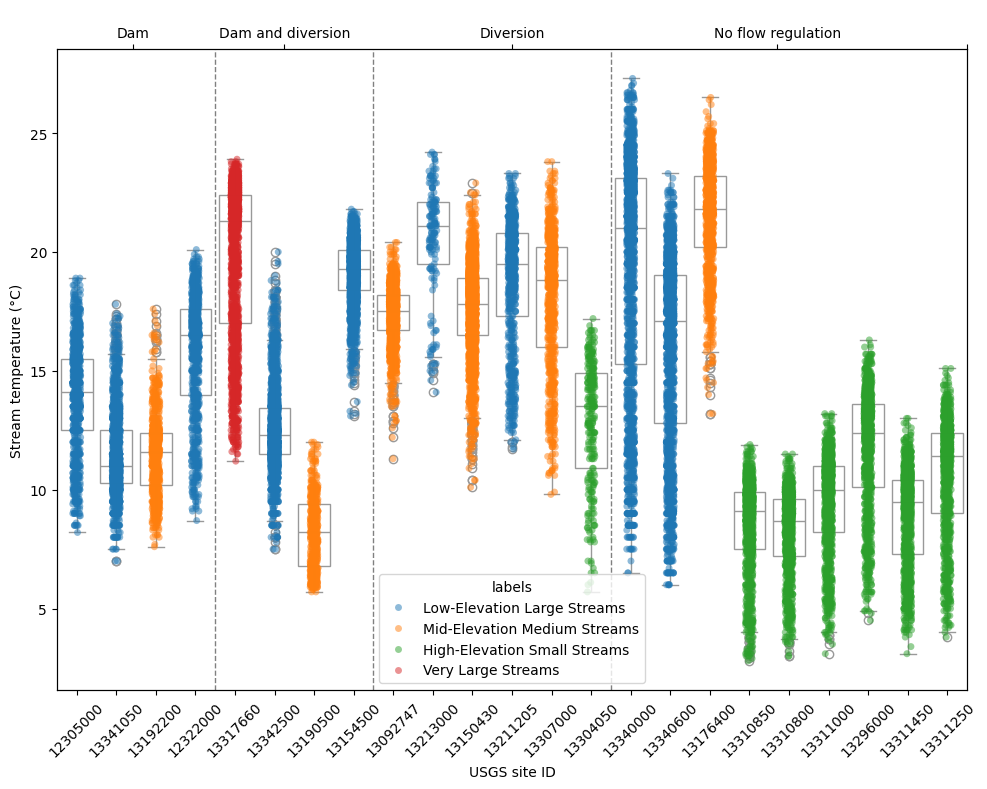

In [13]:
df =  reg_df
x = "site_no" # dam_and_diversion
y = "00010_Mean"
ylabel = "Stream temperature (°C)"
fontsize = 12
png = 'site_no_00010_Mean_labels.png'

ordered_sites = reg_df.sort_values('dam_and_diversion')['site_no'].unique()

print("ordered_sites",ordered_sites)


unique_dams = reg_df['dam_and_diversion'].unique()  # 4 unique values
print("unique_dams",unique_dams)

# Create the boxplot (primary x-axis: site_no)
plt.figure(figsize= figsize )


ax1 = sns.boxplot(x= x, y= y , data= df, color = "white", order=ordered_sites
           )

plt.ylabel( ylabel    )

sns.stripplot(x= x, y= y, data= df,
              hue="labels",
              alpha=0.5, jitter=True
              #, dodge=True
             )

# Rotate x-ticks for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel("USGS site ID")

# --- Add a second x-axis for dam_and_diversion ---
ax2 = ax1.twiny()  # Create a secondary x-axis (top)

# Set the secondary x-ticks to mark the 4 unique dam categories
# (Position them at the center of each dam group)
dam_positions = []
current_dam = reg_df['dam_and_diversion'].iloc[0]
start_idx = 0

for idx, site in enumerate(ordered_sites):
    dam = reg_df[reg_df['site_no'] == site]['dam_and_diversion'].iloc[0]
    print("dam",dam)
    if dam != current_dam:
        # Calculate the middle position of the previous dam group
        mid_pos = (start_idx + idx - 1) / 2
        print("mid_pos",mid_pos)
        dam_positions.append(mid_pos)
        start_idx = idx
        current_dam = dam

# Add the last group's midpoint
mid_pos = (start_idx + len(ordered_sites) ) / 2 - 0.5
print("mid_pos",mid_pos)
dam_positions.append(mid_pos)
print("dam_positions",dam_positions)

dam_positions=[2,  6 , 12, 19,24]

ax1.axvline(x= 3.5, color='gray', linestyle='--', linewidth=1)
ax1.axvline(x= 7.5 , color='gray', linestyle='--', linewidth=1)
ax1.axvline(x= 13.5 , color='gray', linestyle='--', linewidth=1)

# Apply the positions and labels to the second x-axis
ax2.set_xticks(dam_positions)
ax2.set_xticklabels( ['Dam' , 'Dam and diversion' ,'Diversion'  ,'No flow regulation',""]
    #unique_dams
    )
ax2.set_xlabel(" ")  # Optional: Label the second axis


# Adjust layout to prevent label overlap
plt.tight_layout()

plt.savefig( png
           )

plt.show()